### Building SImple Neural Network

In [78]:
import keras

### Sequential Model

#### Method 1: Using `add()` method

In [79]:
dummy_model = keras.models.Sequential()

dummy_model.add(
    keras.layers.Dense(units=3, input_shape=(5,), name='fcnn-1')
)
dummy_model.add(
    # keras.layers.Activation('relu')
    keras.layers.Activation(keras.activations.relu, name='activation-relu')
)
dummy_model.add(
    keras.layers.Dense(units=16, activation='relu', name='fcnn-2')
)
dummy_model.add(
    keras.layers.Dense(5, activation='softmax', name='output-layer')
)


dummy_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ fcnn-1 (Dense)                  │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation-relu (Activation)    │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fcnn-2 (Dense)                  │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output-layer (Dense)            │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167 (668.00 B)

 Trainable params: 167 (668.00 B)

 Non-trainable params: 0 (0.00 B)

In [80]:
# dummy_model.compile(optimizer='sgd', loss=keras.losses.categorical_crossentropy)
dummy_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [81]:
import numpy as np

data = np.random.random((100, 5))
labels = np.random.randint(0, 5, 100)
data.shape, labels.shape

((100, 5), (100,))

In [82]:
from keras.utils import to_categorical
labels = to_categorical(labels)


In [83]:
# validation data
val_data = np.random.random((20, 5))
val_labels = np.random.randint(0, 5, 20)
val_labels = to_categorical(val_labels)

In [84]:
labels

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0.

In [85]:
# callbacks
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

In [86]:
1.6642 - 1.6435

0.02069999999999994

In [ ]:
history = dummy_model.fit(
    data, 
    labels, 
    batch_size=2, 
    epochs=20, 
    validation_data=(val_data, val_labels), 
    callbacks=[early_stopping_cb]
)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2218 - loss: 1.6069 - val_accuracy: 0.3000 - val_loss: 1.6086
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1549 - loss: 1.5942 - val_accuracy: 0.3000 - val_loss: 1.6072
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2280 - loss: 1.6063 - val_accuracy: 0.3500 - val_loss: 1.6059
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2815 - loss: 1.6048 - val_accuracy: 0.3000 - val_loss: 1.6050
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2470 - loss: 1.6095 - val_accuracy: 0.3000 - val_loss: 1.6042
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2274 - loss: 1.5802 - val_accuracy: 0.2500 - val_loss: 1.6037
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2253 - loss: 1.5955 - val_accuracy: 0.2500 - val_loss: 1.6024
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2674 - loss: 1.5856 - val_accuracy: 0.2500 - val_lo

In [88]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [89]:
import matplotlib.pyplot as plt

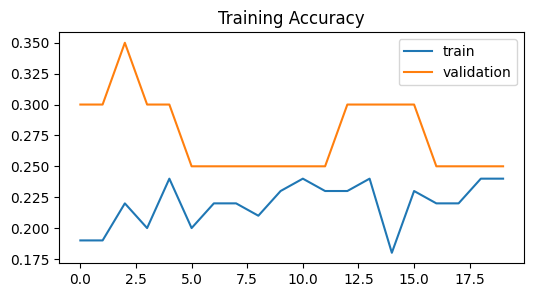

In [90]:
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.figure(figsize=(6, 3))
plt.plot(acc, label='train')
plt.plot(val_accuracy, label='validation')
plt.title('Training Accuracy')
plt.legend()

Text(0.5, 1.0, 'Training Loss')

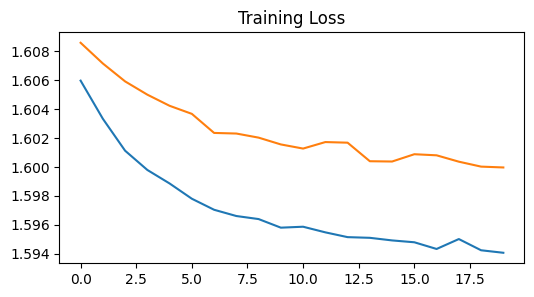

In [91]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(6, 3))
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training Loss')